I have a list of 100 df, each df has 60 groups, each group has columns features , for each df, corresponding to one label. How do I build a training dataset?

In [9]:
label = [[1,0,1]*160]
label

[[1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,


In [7]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# Custom Dataset Class
class StockDataset(Dataset):
    def __init__(self, dataframes_list, target_column, group_size=60, transform=None):
        self.dataframes_list = dataframes_list  # list of dataframes
        self.target_column = target_column      # the target column name
        self.group_size = group_size            # size of the group (e.g., 60)
        self.transform = transform

    def __len__(self):
        return len(self.dataframes_list)  # number of DataFrames (instances)

    def __getitem__(self, idx):
        # Get the DataFrame for the current instance
        df = self.dataframes_list[idx]

        # Extract the features for the 60 groups of data
        features = df.drop(self.target_column, axis=1).values.astype(float)  # shape: (60, num_features)

        # Extract the target label
        target = df[self.target_column].iloc[0]  # assuming the label is consistent across the entire DataFrame

        # Convert to tensor
        features = torch.tensor(features, dtype=torch.float32)  # features tensor (60, num_features)
        target = torch.tensor(target, dtype=torch.float32)  # target tensor (scalar or multi-label)

        # Apply transforms if any
        if self.transform:
            features = self.transform(features)

        return features, target
    
class MyDataProcessor:
    def buildDataFrameList(self, long_list, short_list, hold_list, training):
        combined_list = []

        # Define a mapping for target labels based on the input list
        data_mappings = [
            (long_list, 'long'),
            (short_list, 'short'),
            (hold_list, 'hold')
        ]

        # Iterate over all lists and their corresponding labels
        for data_list, label_type in data_mappings:
            for df in data_list:
                # No need to flatten manually, directly process features
                flattened_data = df.values

                # Create a DataFrame from features
                dataset_df = pd.DataFrame(flattened_data)

                # Add the label column based on the list type
                dataset_df['label'] = self.target_map(label_type)

                # Append the processed DataFrame to the combined list
                combined_list.append(dataset_df)

        return combined_list

    def target_map(self, label_type):
        # Dummy function for illustration
        mapping = {
            'long': [1, 0, 0]*4,
            'short': [0, 1, 0]*4,
            'hold': [0, 0, 1]*4
        }
        return mapping[label_type]

# Example usage
processor = MyDataProcessor()
long_list = [pd.DataFrame({'feature': [1, 2, 3, 4] * 3})]  # Example data
short_list = [pd.DataFrame({'feature': [5, 6, 7, 8] * 3})]
hold_list = [pd.DataFrame({'feature': [9, 10, 11, 12] * 3})]

result = processor.buildDataFrameList(long_list, short_list, hold_list, training=True)
# for df in result:
#     print(df)

# Create dataset
dataset = StockDataset(dataframes_list=result, target_column='label')

# DataLoader for batching
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Check loading
for features, target in dataloader:
    print("Features:", features.shape)  # should print (batch_size, 60, num_features)
    print("Target:", target)

Features: torch.Size([2, 12, 1])
Target: tensor([1., 0.])
Features: torch.Size([1, 12, 1])
Target: tensor([0.])


In [23]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# Custom Dataset Class
class StockDataset(Dataset):
    def __init__(self, dataframes_list, target_column, group_size=60, transform=None):
        self.dataframes_list = dataframes_list  # list of dataframes
        self.target_column = target_column      # the target column name
        self.group_size = group_size            # size of the group (e.g., 60)
        self.transform = transform

    def __len__(self):
        return len(self.dataframes_list)  # number of DataFrames (instances)

    def __getitem__(self, idx):
        # Get the DataFrame for the current instance
        df = self.dataframes_list[idx]

        # Extract the features for the 60 groups of data
        features = df.drop(self.target_column, axis=1).values.astype(float)  # shape: (60, num_features)

        # Extract the target label
        target = df[self.target_column].iloc[0]  # assuming the label is consistent across the entire DataFrame

        # Convert to tensor
        features = torch.tensor(features, dtype=torch.float32)  # features tensor (60, num_features)
        target = torch.tensor(target, dtype=torch.float32)  # target tensor (scalar or multi-label)

        # Apply transforms if any
        if self.transform:
            features = self.transform(features)

        return features, target

# Example DataFrame list (60 groups of data per df)
list = [
    pd.DataFrame({
        'feature': [1, 2, 3, 4, 5, 6, 7, 8] * 60,  # 60 groups of features (example)
        'label': [[1,0,0]] * 480 # label column (same label for each df)
    }),
    pd.DataFrame({
        'feature': [1, 2, 3, 4, 5, 6, 7, 8] * 60,  # 60 groups of features (example)
        'label': [[0,1,0]] * 480 # label column (same label for each df)
    }),
    pd.DataFrame({
        'feature': [1, 2, 3, 4, 5, 6, 7, 8] * 60,  # 60 groups of features (example)
        'label': [[0,0,1]] * 480 # label column (same label for each df)
    }),
    # Add more dataframes to long_list as needed
]

# Create dataset
dataset = StockDataset(dataframes_list=list, target_column='label')
print(len(dataset))
# DataLoader for batching
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Check loading
for features, target in dataloader:
    print("Features:", features.shape)  # should print (batch_size, 60, num_features)
    print("Target:", target)

# Save dataset to file (save tensors if needed)
torch.save(dataset, 'custom_dataset.pth')


3
Features: torch.Size([2, 480, 1])
Target: tensor([[1., 0., 0.],
        [0., 0., 1.]])
Features: torch.Size([1, 480, 1])
Target: tensor([[0., 1., 0.]])


In [26]:
import torch

# Load dataset from file
loaded_dataset = torch.load('../dataset.pth')
print(len(loaded_dataset))
dataloader = DataLoader(loaded_dataset, batch_size=5, shuffle=True)

# Check loading
for features, target in dataloader:
    print("Features:", features.shape)
    print("Target:", target)
    print(features)
    break

401
Features: torch.Size([5, 60, 8])
Target: tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])
tensor([[[ 3.9751e+03,  8.2168e+01,  7.7273e+01,  ...,  6.0129e-01,
           3.0000e+00,  4.6400e+02],
         [ 3.9753e+03,  8.1862e+01,  7.7549e+01,  ...,  6.2969e-01,
           3.0000e+00,  4.6500e+02],
         [ 3.9753e+03,  8.1862e+01,  7.7825e+01,  ...,  6.6377e-01,
           3.0000e+00,  4.6600e+02],
         ...,
         [ 3.9657e+03,  5.7899e+01,  7.8497e+01,  ..., -2.8003e+00,
           3.0000e+00,  5.2100e+02],
         [ 3.9647e+03,  5.7023e+01,  7.7589e+01,  ..., -2.9119e+00,
           3.0000e+00,  5.2200e+02],
         [ 3.9638e+03,  5.5988e+01,  7.6645e+01,  ..., -3.0521e+00,
           3.0000e+00,  5.2300e+02]],

        [[ 4.1217e+03,  8.4018e+00,  1.6884e+01,  ..., -2.7048e+00,
           2.0000e+00,  7.2300e+02],
         [ 4.1221e+03,  8.7531e+00,  1.6057e+01,  ..., -2.3915e+00,
           2.0000e+00,  7

the following StockDataset is a good working class.

In [24]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# Custom Dataset Class
class StockDataset(Dataset):
    def __init__(self, dataframes_list, target_column, group_size=60, num_cols=8, transform=None):
        self.dataframes_list = dataframes_list  # list of dataframes
        self.target_column = target_column      # the target column name
        self.group_size = group_size            # size of the group (e.g., 60)
        self.transform = transform
        self.num_cols = num_cols

    def __len__(self):
        return len(self.dataframes_list)  # number of DataFrames (instances)

    def __getitem__(self, idx):
        # Get the DataFrame for the current instance
        df = self.dataframes_list[idx]

        # Extract the features for the 60 groups of data
        features = df.drop(self.target_column, axis=1).values.astype(float)  # shape: (480, num_features)
        
        # Reshape features to have 60 groups of 8 columns
        features = features.reshape(self.group_size, self.num_cols)  # shape: (60, 8)

        # Extract the target label
        target = df[self.target_column].iloc[0]  # assuming the label is consistent across the entire DataFrame

        # Convert to tensor
        features = torch.tensor(features, dtype=torch.float32)  # features tensor (60, 8)
        target = torch.tensor(target, dtype=torch.float32)  # target tensor (scalar or multi-label)

        # Apply transforms if any
        if self.transform:
            features = self.transform(features)

        return features, target

# Example DataFrame list (60 groups of data per df)
dataframes_list = [
    pd.DataFrame({
        'feature': [1, 2, 3, 4,5,6,7,8] * 60,  # 60 groups of features (example), each group has 8 columns
        'label': [[1, 0, 0]] * 480  # label column (same label for each df)
    }),
    pd.DataFrame({
        'feature': [1, 2, 3, 4,5,6,7,8] * 60,  # 60 groups of features (example)
        'label': [[0, 1, 0]] * 480  # label column (same label for each df)
    }),
    pd.DataFrame({
        'feature': [1, 2, 3, 4,5,6,7,8] * 60,  # 60 groups of features (example)
        'label': [[0, 0, 1]] * 480  # label column (same label for each df)
    }),
    # Add more dataframes to long_list as needed
]
class Normalize:
    def __call__(self, tensor):
        return (tensor - tensor.mean()) / tensor.std()

# Create dataset
dataset = StockDataset(dataframes_list=dataframes_list, target_column='label')
# dataset = StockDataset(dataframes_list=dataframes_list, target_column='label',transform=Normalize())

print(len(dataset))
# DataLoader for batching
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Check loading
for features, target in dataloader:
    print("Features:", features.shape)  # should print (batch_size, 60, 8)
    # print(features)
    print("Target:", target)

# Save dataset to file (save tensors if needed)
torch.save(dataset, 'custom_dataset.pth')


3
Features: torch.Size([2, 60, 8])
Target: tensor([[0., 1., 0.],
        [1., 0., 0.]])
Features: torch.Size([1, 60, 8])
Target: tensor([[0., 0., 1.]])


In the context of the `StockDataset` class, the `transform` parameter is used to apply any preprocessing or data augmentation operations to the features before they are returned. Here’s a breakdown of its purpose and typical use cases:

### Purpose of `transform`
1. **Data Preprocessing**: Transformations can normalize or standardize the features, making the data more suitable for training machine learning models. For example, scaling features to a specific range can improve convergence rates during training.

2. **Data Augmentation**: In scenarios like image processing or time series data, transforms can create variations of the data to improve model robustness. This can involve adding noise, cropping, or rotating images.

3. **Feature Engineering**: You might want to derive new features or modify existing ones based on specific rules or domain knowledge.

### Example Transformations
Here are a few examples of what kinds of transformations could be applied:

- **Normalization**: Adjusting the features to have a mean of 0 and a standard deviation of 1.
  ```python
  class Normalize:
      def __call__(self, tensor):
          return (tensor - tensor.mean()) / tensor.std()
  ```

- **Min-Max Scaling**: Scaling the features to a specific range (e.g., [0, 1]).
  ```python
  class MinMaxScaler:
      def __init__(self, min_val=0, max_val=1):
          self.min_val = min_val
          self.max_val = max_val
      
      def __call__(self, tensor):
          return (tensor - tensor.min()) / (tensor.max() - tensor.min()) * (self.max_val - self.min_val) + self.min_val
  ```

- **Augmentation**: Adding random noise to the features.
  ```python
  class AddNoise:
      def __init__(self, noise_level=0.1):
          self.noise_level = noise_level
      
      def __call__(self, tensor):
          noise = torch.randn_like(tensor) * self.noise_level
          return tensor + noise
  ```

### How to Use It
To use a transform in your dataset, you would create an instance of the transform class and pass it to the `StockDataset`:

```python
# Example usage of a transform
transform = Normalize()  # or MinMaxScaler(), AddNoise(), etc.

# Create dataset with the transform
dataset = StockDataset(dataframes_list=dataframes_list, target_column='label', transform=transform)
```

### In Summary
The `transform` parameter in the `StockDataset` class allows for flexible preprocessing of your features, enabling better training and performance of your machine learning models. You can implement any transformation that suits your specific use case, making your dataset preparation more versatile and effective.

In [46]:
# Load dataset from file
loaded_dataset = torch.load('custom_dataset.pth')
dataloader = DataLoader(loaded_dataset, batch_size=2, shuffle=True)

# Check loading
for features, target in dataloader:
    print("Features:", features)
    print("Target:", target)


Features: tensor([[[1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
 

In [55]:
import numpy as np
import torch

# Normalize class
class Normalize:
    def __call__(self, tensor):
        return (tensor - tensor.mean()) / tensor.std()

# Create a NumPy array
numpy_array = np.array([[1, 2, 3, 4, 5, 6, 7,8]])

# Create a PyTorch tensor from the NumPy array
tensor_from_numpy = torch.tensor(numpy_array, dtype=torch.float32)

# Create an instance of the Normalize class
normalizer = Normalize()

# Normalize the tensor
normalized_tensor = normalizer(tensor_from_numpy)

print("Original Tensor:")
print(tensor_from_numpy)
print("\nNormalized Tensor:")
print(normalized_tensor)


Original Tensor:
tensor([[1., 2., 3., 4., 5., 6., 7., 8.]])

Normalized Tensor:
tensor([[-1.4289, -1.0206, -0.6124, -0.2041,  0.2041,  0.6124,  1.0206,  1.4289]])


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import savgol_filter


In [20]:
df = pd.read_csv('../data/AMZN.csv')  # Load your stock data
# df = df2.tail(500)
# df = df2.iloc[0:500]
df['close_smooth'] = savgol_filter(df['close'], 49, 5)  # Optional: Smoothing


In [21]:
peaks, _ = find_peaks(df['close_smooth'], distance=10, prominence=1)
troughs, _ = find_peaks(-df['close_smooth'], distance=10, prominence=1)


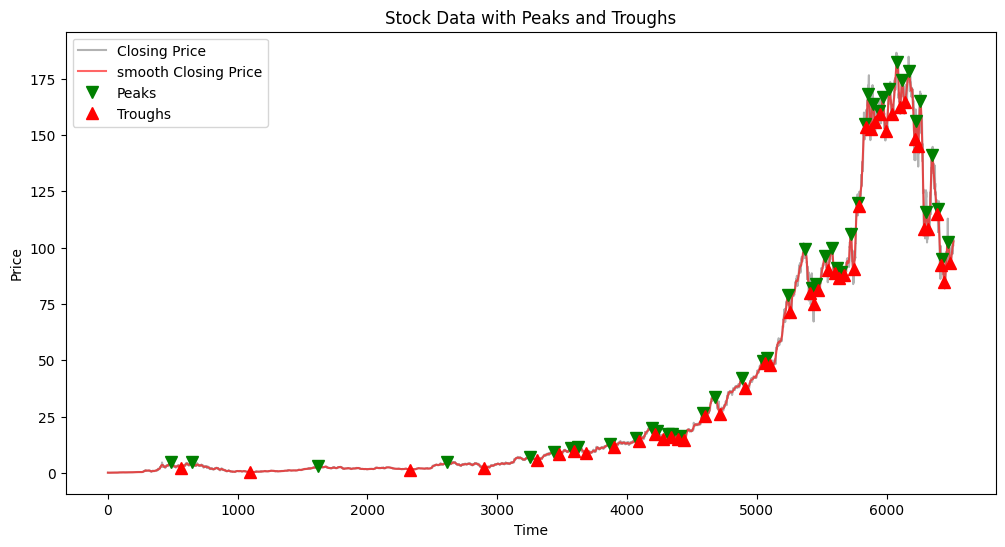

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df.index, df['close'], label='Closing Price', color='grey', alpha=0.6)
ax.plot(df.index, df['close_smooth'], label='smooth Closing Price', color='red', alpha=0.6)
ax.plot(peaks, df['close_smooth'].iloc[peaks], 'v', color='green', markersize=8, label='Peaks')
ax.plot(troughs, df['close_smooth'].iloc[troughs], '^', color='red', markersize=8, label='Troughs')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Data with Peaks and Troughs')
plt.legend()
plt.show()
